# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import statsmodels.api as sample_data
import sklearn as skl

import copy

from sklearn import metrics
import matplotlib.dates as mdates

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf

# Import Data

In [4]:
# Stock Data
stock_ticker = ['MSFT', 'IBM', 'GOOGL', 'AAPL']
stock_data = yf.download(tickers = stock_ticker, interval = "1d", start='2010-01-01', end='2015-01-01', group_by = 'column')

# Index Data
index_ticker = ['^GSPC', '^DJI', '^IXIC', '^VIX']
index_data = yf.download(tickers = index_ticker, interval = "1d", start='2010-01-01', end='2015-01-01')

# Exchange Data
fx_ticker = ['CAD=X', 'JPY=X', 'GBP=X']
fx_data = yf.download(tickers = fx_ticker, interval = "1d", start='2010-01-01', end='2015-01-01')

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  3 of 3 completed


In [5]:
print(stock_data.isna().sum())

print(index_data.isna().sum())

print(fx_data.isna().sum())


Price      Ticker
Adj Close  AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Close      AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
High       AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Low        AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Open       AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Volume     AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
dtype: int64
Price      Ticker
Adj Close  ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Close      ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
High       ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Low        ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Open       ^DJI      0
        

In [6]:
# Flatten the data
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data = stock_data.reset_index()

index_data.columns = ['_'.join(col).strip() for col in index_data.columns.values]
index_data = index_data.reset_index()

fx_data.columns = ['_'.join(col).strip() for col in fx_data.columns.values]
fx_data = fx_data.reset_index()

# Set Date as index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

index_data['Date'] = pd.to_datetime(index_data['Date'])
index_data.set_index('Date', inplace=True)

fx_data['Date'] = pd.to_datetime(fx_data['Date'])
fx_data.set_index('Date', inplace=True)

In [7]:
print(stock_data.dtypes, '\n')
print(index_data.dtypes, '\n')
print(fx_data.dtypes)

Adj Close_AAPL     float64
Adj Close_GOOGL    float64
Adj Close_IBM      float64
Adj Close_MSFT     float64
Close_AAPL         float64
Close_GOOGL        float64
Close_IBM          float64
Close_MSFT         float64
High_AAPL          float64
High_GOOGL         float64
High_IBM           float64
High_MSFT          float64
Low_AAPL           float64
Low_GOOGL          float64
Low_IBM            float64
Low_MSFT           float64
Open_AAPL          float64
Open_GOOGL         float64
Open_IBM           float64
Open_MSFT          float64
Volume_AAPL          int64
Volume_GOOGL         int64
Volume_IBM           int64
Volume_MSFT          int64
dtype: object 

Adj Close_^DJI     float64
Adj Close_^GSPC    float64
Adj Close_^IXIC    float64
Adj Close_^VIX     float64
Close_^DJI         float64
Close_^GSPC        float64
Close_^IXIC        float64
Close_^VIX         float64
High_^DJI          float64
High_^GSPC         float64
High_^IXIC         float64
High_^VIX          float64
Low_^DJI    

# Organize Data

In [8]:
print(stock_data.shape)
print(index_data.shape)
print(fx_data.shape)

(1258, 24)
(1258, 24)
(1302, 18)


In [9]:
# Convert the indices of the three DataFrames to sets
stock_dates = set(stock_data.index)
index_dates = set(index_data.index)
fx_dates = set(fx_data.index)

# Find the dates that are unique to fx_data
unique_fx_dates = fx_dates - (stock_dates.union(index_dates))

# Convert the set back to a list and sort it, if you want to view the dates in order
unique_fx_dates_sorted = sorted(list(unique_fx_dates))

print(len(unique_fx_dates))
print(unique_fx_dates_sorted)

46
[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-18 00:00:00'), Timestamp('2010-02-15 00:00:00'), Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-05 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-01-17 00:00:00'), Timestamp('2011-02-21 00:00:00'), Timestamp('2011-04-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-09-05 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2012-01-02 00:00:00'), Timestamp('2012-01-16 00:00:00'), Timestamp('2012-02-20 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-28 00:00:00'), Timestamp('2012-07-04 00:00:00'), Timestamp('2012-09-03 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2012-12-25 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp(

This discrepancy can happen due to differences in the trading days or availability of data, especially with FX markets potentially being quoted on days when stock markets are closed. To handle this issue, you can align all three datasets by their index (dates) before merging them into a single DataFrame

In [10]:
common_dates = stock_data.index.intersection(index_data.index).intersection(fx_data.index)

stock_data_aligned = stock_data.loc[common_dates]
index_data_aligned = index_data.loc[common_dates]
fx_data_aligned = fx_data.loc[common_dates]

data = {
    'MSFT': stock_data_aligned['Adj Close_MSFT'],
    'GOOGL': stock_data_aligned['Adj Close_GOOGL'],
    'IBM': stock_data_aligned['Adj Close_IBM'],
    'AAPL': stock_data_aligned['Adj Close_AAPL'],
    'DIA': index_data_aligned['Adj Close_^DJI'],
    'SPX': index_data_aligned['Adj Close_^GSPC'],
    'NSDQ': index_data_aligned['Adj Close_^IXIC'],
    'VIX': index_data_aligned['Adj Close_^VIX'],
    'CADUSD': fx_data_aligned['Adj Close_CAD=X'],
    'JPYUSD': fx_data_aligned['Adj Close_JPY=X'],
    'GBPUSD': fx_data_aligned['Adj Close_GBP=X']
}

# Create the final DataFrame
df = pd.DataFrame(data, index=common_dates)

In [11]:
# Drop one missing data

df = df.dropna()
print(df.shape)
print(df.isna().sum())

(1255, 11)
MSFT      0
GOOGL     0
IBM       0
AAPL      0
DIA       0
SPX       0
NSDQ      0
VIX       0
CADUSD    0
JPYUSD    0
GBPUSD    0
dtype: int64


In [12]:
# We convert all variables to percentage change, So, there we no need to normalize anymore

pctdf = df.pct_change()
pctdf = pctdf.dropna()

In [13]:
# Add 5 largest correlated lags of the MSFT percentage change of daily price

correlations = {}
for lag in range(1, 22):
    pctdf[f'MSFT_lag_{lag}'] = pctdf['MSFT'].shift(lag)
    correlation = pctdf['MSFT'].corr(pctdf[f'MSFT_lag_{lag}'])
    correlations[lag] = correlation

top_5_lags = sorted(correlations, key=correlations.get, reverse=True)[:5]

for lag in top_5_lags:
    print(f"Lag: {lag}, Correlation: {correlations[lag]}")

columns_to_drop = [f'MSFT_lag_{lag}' for lag in range(1, 22) if lag not in top_5_lags]
pctdf.drop(columns=columns_to_drop, inplace=True)

Lag: 19, Correlation: 0.04836602652642866
Lag: 12, Correlation: 0.04661785140088837
Lag: 11, Correlation: 0.03753099746767513
Lag: 10, Correlation: 0.03666913968157281
Lag: 14, Correlation: 0.02387507966642061


In [14]:
# Drop NaNs

pctdf = pctdf.dropna()
print(pctdf.shape)
print(pctdf.isna().sum())

(1235, 16)
MSFT           0
GOOGL          0
IBM            0
AAPL           0
DIA            0
SPX            0
NSDQ           0
VIX            0
CADUSD         0
JPYUSD         0
GBPUSD         0
MSFT_lag_10    0
MSFT_lag_11    0
MSFT_lag_12    0
MSFT_lag_14    0
MSFT_lag_19    0
dtype: int64


In [15]:
# Rename it to data for simplicity

data = pctdf.copy()
data.head()

,MSFT,GOOGL,IBM,AAPL,DIA,SPX,NSDQ,VIX,CADUSD,JPYUSD,GBPUSD,MSFT_lag_10,MSFT_lag_11,MSFT_lag_12,MSFT_lag_14,MSFT_lag_19
Date,,,,,,,,,,,,,,,,
2010-02-02,0.001760,-0.003565,0.006899,0.005803,0.010929,0.012973,0.008686,-0.049137,-0.004257,-0.003658,-0.002473,0.007777,-0.003230,0.020099,-0.006607,0.000323
2010-02-03,0.005973,0.018263,0.001035,0.017206,-0.002554,-0.005474,0.000388,0.005587,0.004370,0.004556,0.004526,-0.016399,0.007777,-0.003230,0.009312,-0.006137
2010-02-04,-0.027593,-0.025961,-0.021168,-0.036039,-0.026130,-0.031141,-0.029887,0.207407,0.009606,-0.015742,0.009520,-0.018961,-0.016399,0.007777,0.020099,-0.010400
2010-02-05,0.006466,0.008561,0.004227,0.017756,0.001005,0.002897,0.007382,0.001150,-0.001026,-0.002125,0.007144,-0.034988,-0.018961,-0.016399,-0.003230,0.006896
2010-02-08,-0.010707,0.004103,-0.008863,-0.006856,-0.010371,-0.008863,-0.007038,0.015320,0.003436,0.000000,0.005261,0.012431,-0.034988,-0.018961,0.007777,-0.012720


# Data Summary

In [16]:
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

pctdf.describe()

,MSFT,GOOGL,IBM,AAPL,DIA,SPX,NSDQ,VIX,CADUSD,JPYUSD,GBPUSD,MSFT_lag_10,MSFT_lag_11,MSFT_lag_12,MSFT_lag_14,MSFT_lag_19
count,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000,1235.0000
mean,0.0006,0.0007,0.0003,0.0013,0.0005,0.0006,0.0007,0.0025,0.0001,0.0002,0.0000,0.0005,0.0005,0.0006,0.0006,0.0006
std,0.0139,0.0157,0.0116,0.0167,0.0092,0.0101,0.0113,0.0747,0.0052,0.0063,0.0050,0.0140,0.0139,0.0139,0.0139,0.0139
min,-0.1140,-0.0893,-0.0828,-0.1236,-0.0555,-0.0666,-0.0690,-0.2957,-0.0188,-0.0315,-0.0210,-0.1140,-0.1140,-0.1140,-0.1140,-0.1140
25%,-0.0074,-0.0071,-0.0054,-0.0073,-0.0036,-0.0038,-0.0044,-0.0389,-0.0028,-0.0031,-0.0029,-0.0075,-0.0074,-0.0074,-0.0074,-0.0074
50%,0.0003,0.0004,0.0003,0.0011,0.0006,0.0007,0.0011,-0.0050,-0.0002,0.0001,0.0000,0.0003,0.0003,0.0003,0.0003,0.0003
75%,0.0085,0.0086,0.0064,0.0111,0.0051,0.0055,0.0067,0.0329,0.0029,0.0034,0.0029,0.0085,0.0085,0.0085,0.0085,0.0085
max,0.0729,0.1380,0.0567,0.0887,0.0424,0.0474,0.0529,0.5000,0.0266,0.0382,0.0174,0.0729,0.0729,0.0729,0.0729,0.0729


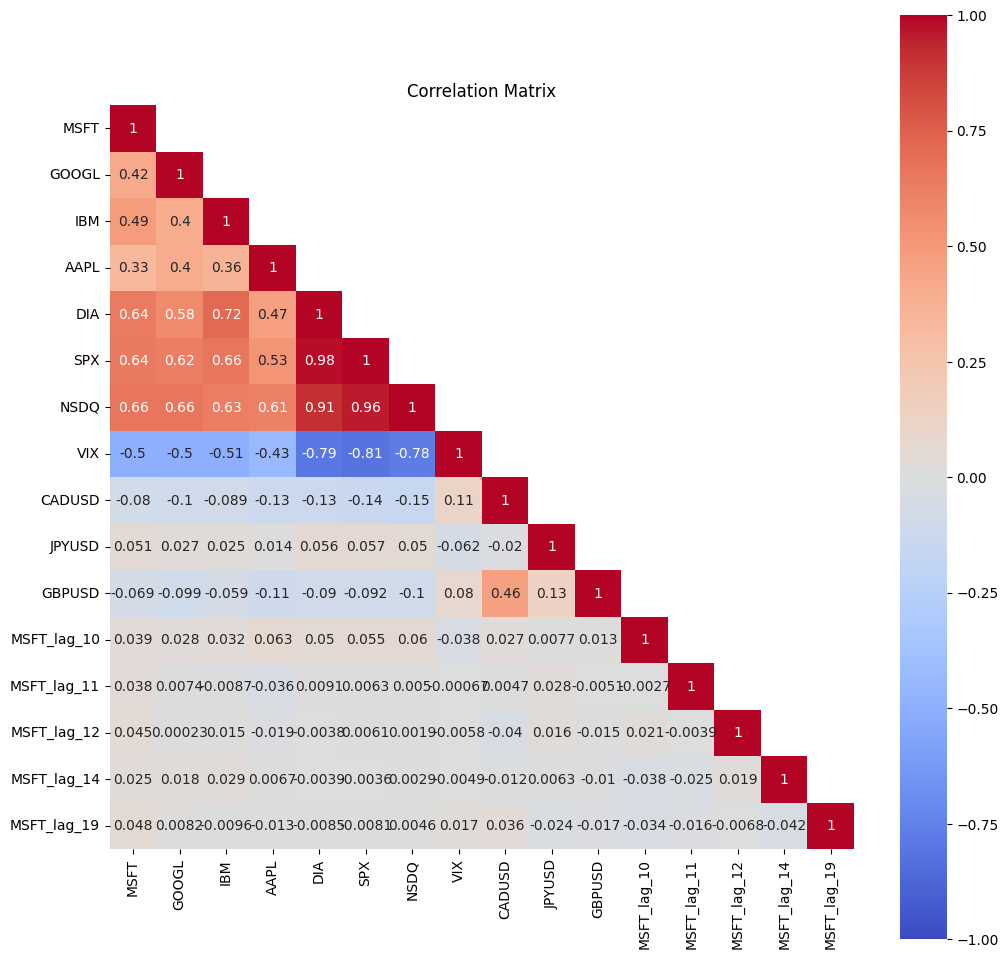

In [17]:
correlation = data.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
mask = np.triu(np.ones_like(correlation, dtype = bool),  k = 1)
sns.heatmap(correlation, mask = mask, vmin=-1, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

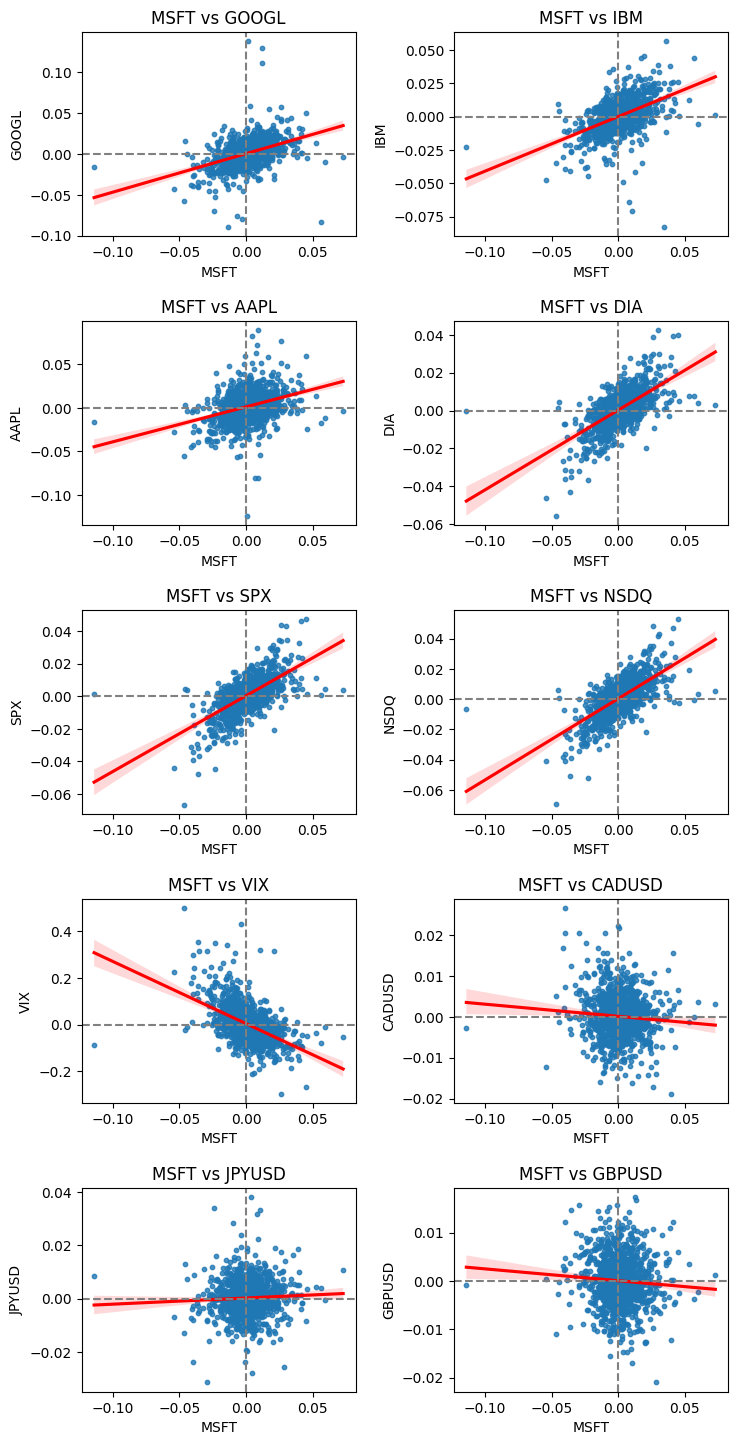

In [18]:
columns_to_plot = [col for col in data.columns if "MSFT" not in col]

nrows = int(len(columns_to_plot) / 2)
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize=(8, 3*nrows))
fig.tight_layout(pad=4.0)

for i, col in enumerate(columns_to_plot):
    ax = axs[i//ncols, i%ncols]
    sns.regplot(x='MSFT', y=col, data=data, ax=ax, scatter_kws={'s':10}, line_kws={'color': 'red'})
    ax.set_title(f'MSFT vs {col}')
    ax.set_xlabel('MSFT')
    ax.set_ylabel(col)

    ax.axhline(0, color='gray', linestyle='--')
    ax.axvline(0, color='gray', linestyle='--')

plt.show()


# Train-Test Split

In [19]:
rate = 0.8
index = int(rate * len(data))

X_train = data.drop('MSFT', axis = 1).iloc[:index]
Y_train = data['MSFT'].iloc[:index]

X_test = data.drop('MSFT', axis = 1).iloc[index:]
Y_test = data['MSFT'].iloc[index:]

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (988, 15), Y_train shape: (988,)
X_test shape: (247, 15), Y_test shape: (247,)


# KNN Regression

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor(n_neighbors = 2).fit(X_train, Y_train)

Y_test_pred_knn = knn_regressor.predict(X_test)  # Out-of-sample prediction

# Calculating errors
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

RMSE_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred_knn))
MAE_test = mean_absolute_error(Y_test, Y_test_pred_knn)
MPE_test = mean_percentage_error(Y_test, Y_test_pred_knn)

print("Out-of-sample Errors:")
print(f"RMSE: {RMSE_test}, MAE: {MAE_test}, MPE: {MPE_test}%")

Out-of-sample Errors:
RMSE: 0.012019941704835137, MAE: 0.00949961346582997, MPE: nan%


Considering the nature of KNN regression and stock return it's applied to, division by zero due to zero actual values) is most likely cause of the nan values in MPE.

In [21]:
KNN_results = pd.DataFrame(index = data.index)

KNN_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
KNN_results.loc[index:, 'KNN_pred'] = np.cumprod(1 + Y_test_pred_knn) *1000

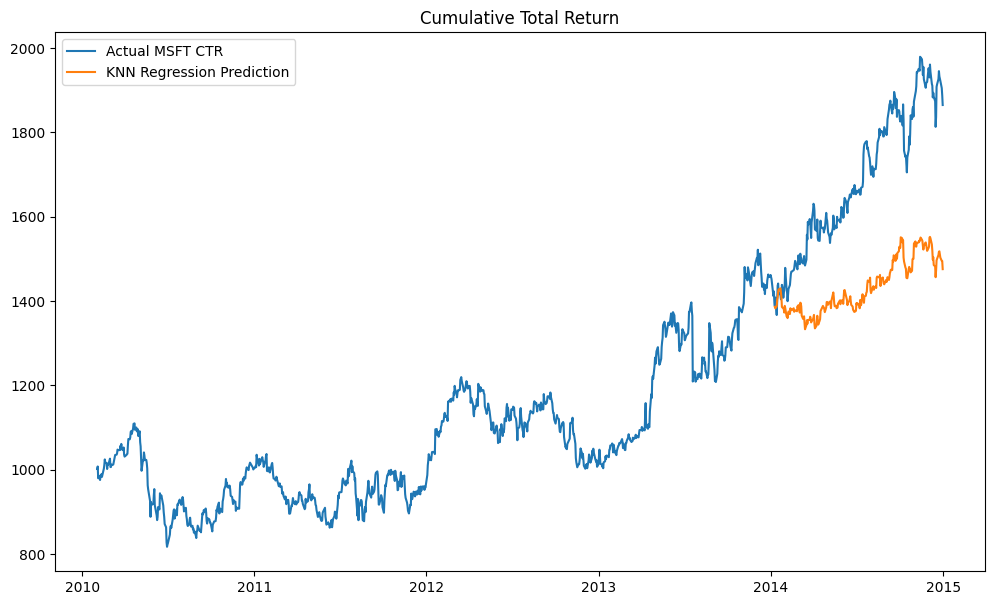

In [22]:
plt.figure(figsize = (12, 7))

shift = KNN_results['MSFT_CTR'].iloc[index] -1000

plt.plot(KNN_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(KNN_results['KNN_pred'] + shift, label = 'KNN Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

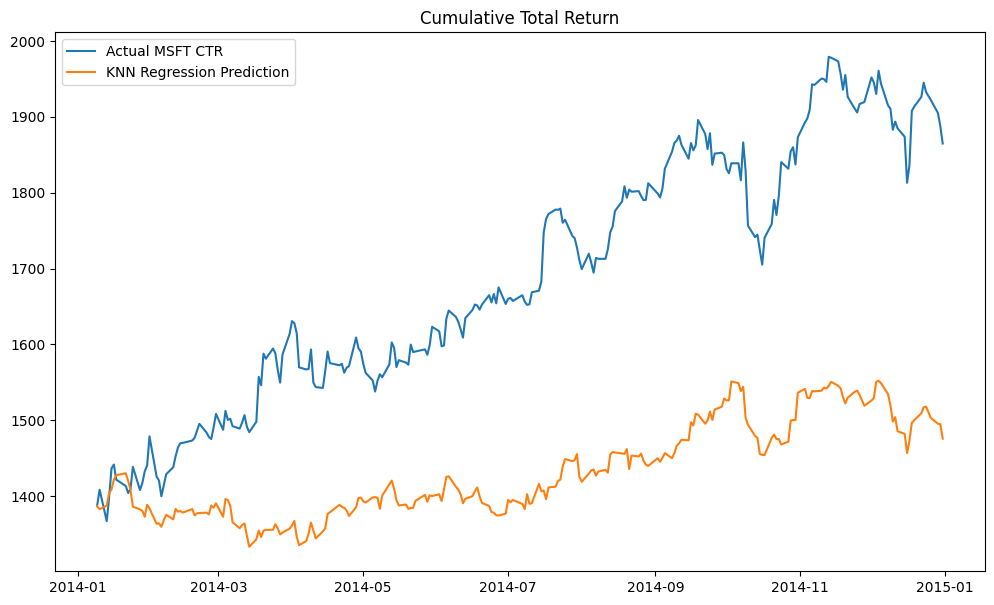

In [23]:
plt.figure(figsize = (12, 7))

plt.plot(KNN_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(KNN_results['KNN_pred'] + shift, label = 'KNN Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

## Optimize KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

best_rmse = float('inf')
best_mae = float('inf')
best_n_neighbors_rmse = None
best_n_neighbors_mae = None

# Setup time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through possible values of n_neighbors
for n_neighbors in range(2, 20):
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

    cv_rmse_scores = cross_val_score(knn_regressor, X_train, Y_train, cv=tscv, scoring=rmse_scorer)
    cv_mae_scores = cross_val_score(knn_regressor, X_train, Y_train, cv=tscv, scoring='neg_mean_absolute_error')
    avg_rmse = -cv_rmse_scores.mean()
    avg_mae = -cv_mae_scores.mean()

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_n_neighbors_rmse = n_neighbors

    if avg_mae < best_mae:
        best_mae = avg_mae
        best_n_neighbors_mae = n_neighbors

print(f"Optimized number of neighbors for RMSE: {best_n_neighbors_rmse} with RMSE: {best_rmse}")
print(f"Optimized number of neighbors for MAE: {best_n_neighbors_mae} with MAE: {best_mae}")

Optimized number of neighbors for RMSE: 12 with RMSE: 0.011467362982082174
Optimized number of neighbors for MAE: 12 with MAE: 0.008228334288673672


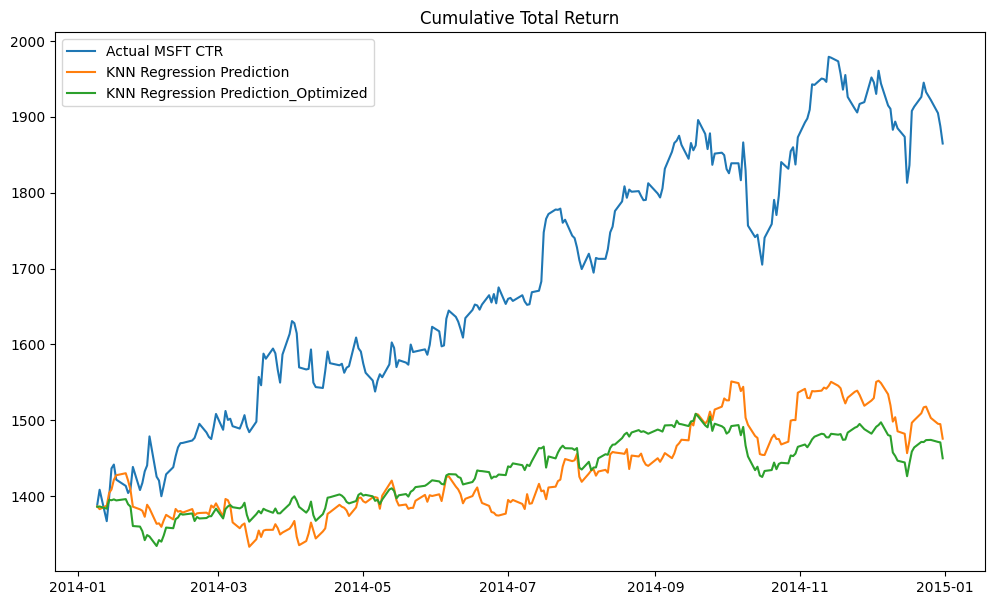

In [25]:
# Train the model on the scaled data
knn_regressor = KNeighborsRegressor(n_neighbors=17).fit(X_train, Y_train)
Y_test_pred_knn = knn_regressor.predict(X_test)

KNN_results.loc[index:, 'KNN_pred_opt'] = np.cumprod(1 + Y_test_pred_knn) *1000

plt.figure(figsize = (12, 7))

shift = KNN_results['MSFT_CTR'].iloc[index] -1000

plt.plot(KNN_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(KNN_results['KNN_pred'] + shift, label = 'KNN Regression Prediction')
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction_Optimized')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

## Grid Search for Optimization

For a K-Nearest Neighbors (KNN) regressor, several parameters can be optimized in addition to the number of neighbors (n_neighbors). Here are a few key parameters you might consider tuning to improve model performance:

Weights: This parameter controls how the prediction is made from the k-nearest neighbors. There are mainly two types:

uniform: All points in each neighborhood are weighted equally.
distance: Points are weighted by the inverse of their distance. Closer neighbors will have a greater influence on the prediction.
Algorithm: The algorithm parameter specifies the algorithm used to compute the nearest neighbors. Options include:

ball_tree: Uses a Ball Tree algorithm for large datasets.
kd_tree: Uses a KD Tree algorithm for medium-sized datasets.
brute: Uses a brute-force search.
auto: Attempts to decide the most appropriate algorithm based on the values passed to fit method.
Leaf Size: This parameter can affect the speed of the search and the memory required. It's used by the ball_tree or kd_tree algorithms. A larger leaf size means that the algorithm will use more memory but may improve query speed.

Metric: The distance metric used for the tree can be crucial depending on the shape of your data. Common metrics include:

euclidean: The standard Euclidean distance. Good for most cases with continuous features.
manhattan: Sum of absolute differences. Useful for high-dimensional data.
minkowski: A generalization of the Euclidean and Manhattan distances. The p parameter determines the power of the Minkowski metric.
And others, including custom metrics.
P: When using the Minkowski metric (metric='minkowski'), the power parameter p determines the degree of the metric. For example, p=2 is equivalent to using the Euclidean distance, while p=1 is equivalent to using the Manhattan distance.

In [26]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor

# Define your parameter grid as before
param_grid = {
    'n_neighbors': range(2, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 70],
    'p': [1, 2]
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Setup time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the Grid Search model with the time series cross-validator
grid_search = GridSearchCV(knn, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

# Assuming X_train, Y_train are already defined and properly ordered in time
grid_search.fit(X_train, Y_train)

# Print the best parameters and their corresponding RMSE
print("Best parameters:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE:", best_rmse)


Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best RMSE: 0.011483385477639201


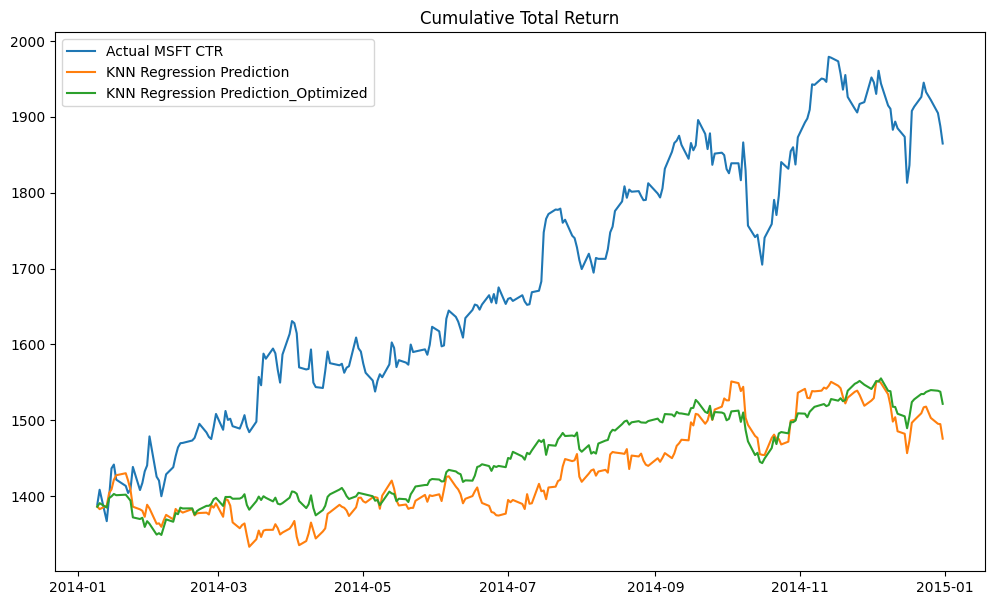

In [27]:
# Train the model on the scaled data
knn_regressor = KNeighborsRegressor(n_neighbors=19, algorithm='auto', leaf_size=10, p = 1, weights='distance').fit(X_train, Y_train)
Y_test_pred_knn = knn_regressor.predict(X_test)

KNN_results.loc[index:, 'KNN_pred_opt'] = np.cumprod(1 + Y_test_pred_knn) *1000

plt.figure(figsize = (12, 7))

shift = KNN_results['MSFT_CTR'].iloc[index] -1000

plt.plot(KNN_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(KNN_results['KNN_pred'] + shift, label = 'KNN Regression Prediction')
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction_Optimized')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# SVM Regression

In [28]:
# We optimize SVM Regression's parameters for train data set, and use the parameters to predict the test data set

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define your time series split for time series cross-validation
tscv = TimeSeriesSplit(n_splits = 2)

# Parameters to be tested for optimization
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100],
    'gamma': ['auto', 'scale'],
    'epsilon': [0.01, 0.1]
}


# Initialize the SVR model
svr = SVR()

# Setup the grid search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best model (in-sample) after grid search
best_model = grid_search.best_estimator_

# Predict using the best model
Y_pred = best_model.predict(X_train)

# Evaluation metrics
rmse = mean_squared_error(Y_train, Y_pred, squared=False)
mae = mean_absolute_error(Y_train, Y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Fitting 2 folds for each of 48 candidates, totalling 96 fits
Best Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
RMSE: 0.010218290334969484
MAE: 0.007009459575329775


In [29]:
# Use optimal parameters

best_params = grid_search.best_params_
model = SVR(C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Fit the model on the training set
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

In [30]:
SVR_results = pd.DataFrame(index = data.index)

SVR_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
SVR_results.loc[index:, 'SVR_pred'] = np.cumprod(1 + Y_pred) *1000

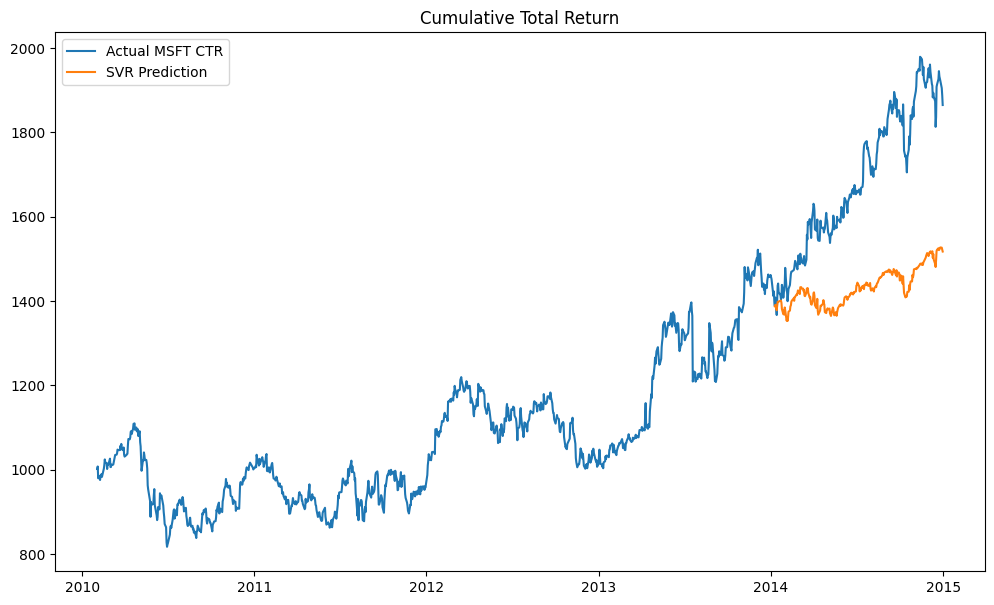

In [31]:
plt.figure(figsize = (12, 7))

shift = SVR_results['MSFT_CTR'].iloc[index] -1000

plt.plot(SVR_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

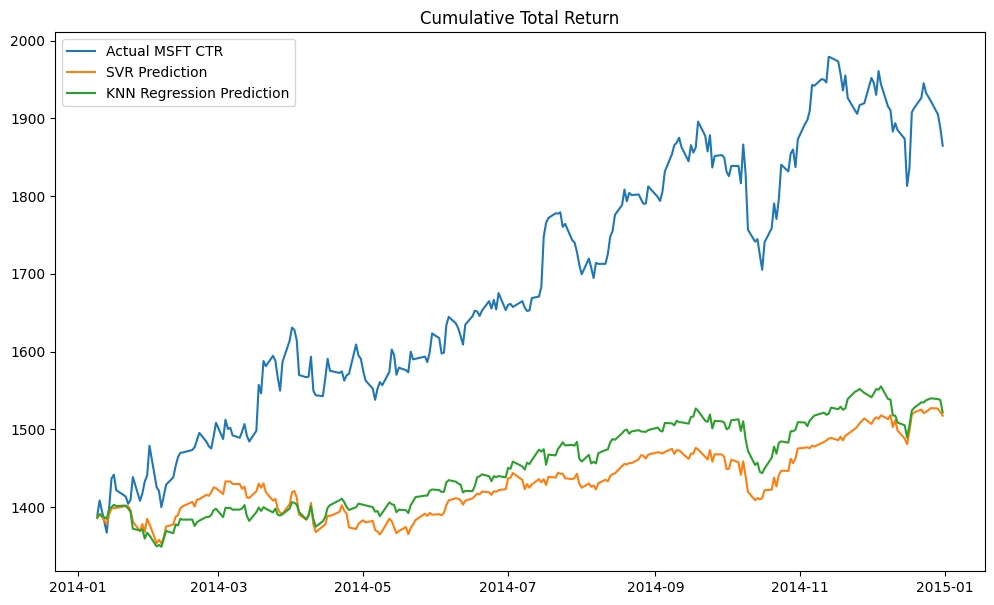

In [32]:
plt.figure(figsize = (12, 7))

plt.plot(SVR_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction')
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Decision Trees Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# Define the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Define custom scorer functions for RMSE and MAE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mae, greater_is_better=False)

# Scoring dictionary
scoring = {'RMSE': rmse_scorer, 'MAE': mae_scorer}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits = 2)

# GridSearchCV to find the best parameters based on the defined scoring.
# Note: This setup will return the best parameters for minimizing RMSE.
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring=scoring, refit='RMSE', cv=tscv, verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and scores
print("Best parameters found: ", grid_search.best_params_)
print("Best score for RMSE: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

# Make predictions using the optimized model
predictions = best_model.predict(X_test)

# Calculate and print RMSE and MAE for the test set
test_rmse = rmse(Y_test, predictions)
test_mae = mae(Y_test, predictions)
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score for RMSE:  -0.01212408328763769
Test RMSE: 0.011229108299993166
Test MAE: 0.008668327020775858


The reason for presenting the RMSE value as negative in the grid search results is to align with the convention that the grid search seeks to maximize a score. By negating the RMSE values, lower RMSE values (which are better) are converted into higher scores for the purpose of comparison and selection of the best model by GridSearchCV.

In [34]:
DT_results = pd.DataFrame(index = data.index)

DT_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
DT_results.loc[index:, 'DT_pred'] = np.cumprod(1 + predictions) *1000

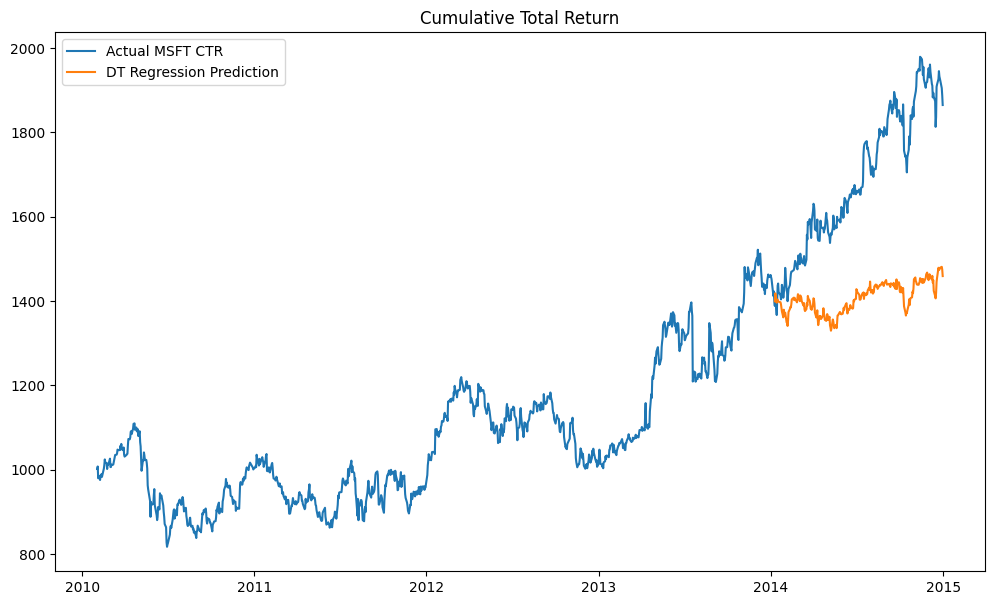

In [35]:
plt.figure(figsize = (12, 7))

shift = DT_results['MSFT_CTR'].iloc[index] -1000

plt.plot(DT_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(DT_results['DT_pred'] + shift, label = 'DT Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

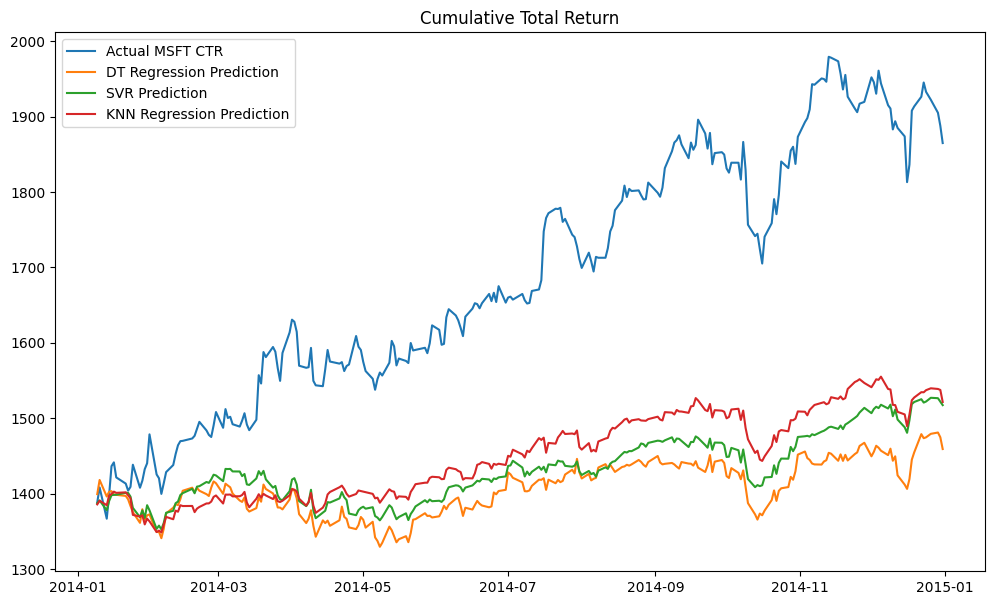

In [36]:
plt.figure(figsize = (12, 7))

plt.plot(SVR_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(DT_results['DT_pred'] + shift, label = 'DT Regression Prediction')
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction')
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Random Forest

For time series data, the approach to model training and validation must account for the temporal order of the data. Using a simple random split (as in a traditional train-test split) or even a simple indexed split without considering time-based dependencies might lead to unrealistic evaluation of the model's performance. Given your dataset is a time series, a more appropriate method is to use time-based splitting.

However, when using time series data with models like Random Forest, one common approach is to still proceed with splitting the data based on time (as you've done), but it's crucial to ensure that the model is validated in a way that respects the temporal order. This typically means using techniques like Time Series Cross-Validation rather than standard cross-validation.

GridSearchCV with a custom cross-validator can be adjusted for time series, but a simpler and more intuitive approach for time series is to use the TimeSeriesSplit from Scikit-learn for cross-validation. This method ensures that the validation set always comes after the training set.

In [37]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer


# Define a custom scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [None, 2, 5, 10, 20],
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 2)

# Grid search with TimeSeriesSplit to respect the order in the time series data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=rmse_scorer, cv=tscv)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters for minimizing RMSE:", grid_search.best_params_)

# Predict using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSE and MAE on the test set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae_test = mean_absolute_error(Y_test, Y_pred)

print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")


Best parameters for minimizing RMSE: {'max_depth': 2, 'n_estimators': 50}
Test RMSE: 0.009880702562730957
Test MAE: 0.007421364680099747


In [38]:
RF_results = pd.DataFrame(index = data.index)

RF_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
RF_results.loc[index:, 'RF_pred'] = np.cumprod(1 + Y_pred) *1000

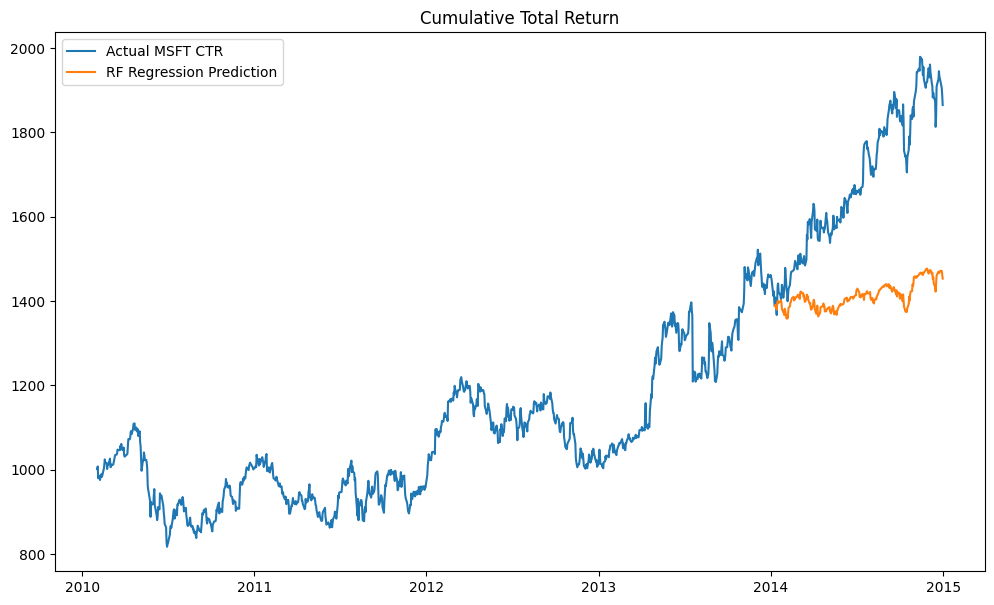

In [39]:
plt.figure(figsize = (12, 7))

shift = RF_results['MSFT_CTR'].iloc[index] -1000

plt.plot(RF_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(RF_results['RF_pred'] + shift, label = 'RF Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

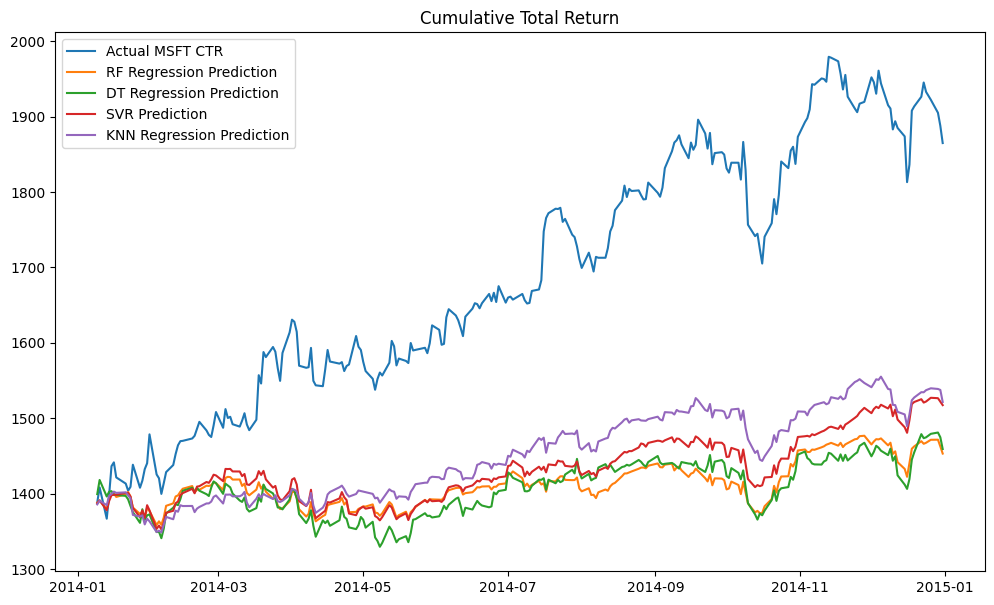

In [40]:
plt.figure(figsize = (12, 7))

plt.plot(SVR_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(RF_results['RF_pred'] + shift, label = 'RF Regression Prediction')
plt.plot(DT_results['DT_pred'] + shift, label = 'DT Regression Prediction')
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction')
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Gradiend Boosting

In [41]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer


# Define a custom scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2, 3, 4]
}

# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 2)

# Grid search with TimeSeriesSplit to respect the order in the time series data
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring=rmse_scorer, cv=tscv)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters for minimizing RMSE:", grid_search.best_params_)

# Predict using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSE and MAE on the test set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae_test = mean_absolute_error(Y_test, Y_pred)

print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")


Best parameters for minimizing RMSE: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 400}
Test RMSE: 0.009659344309327671
Test MAE: 0.007241037222730167


In [42]:
GB_results = pd.DataFrame(index = data.index)

GB_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
GB_results.loc[index:, 'GB_pred'] = np.cumprod(1 + Y_pred) *1000

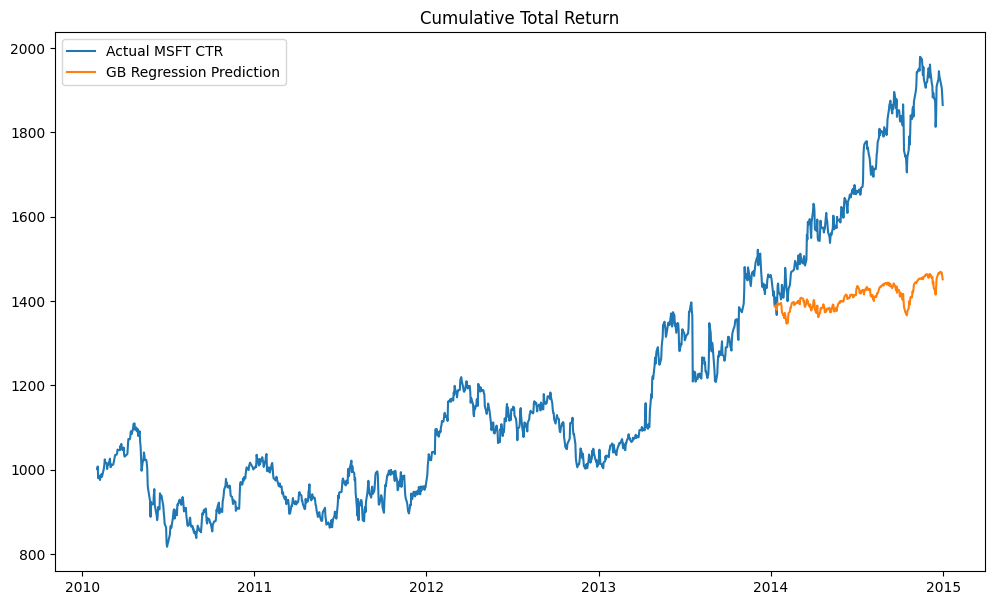

In [43]:
plt.figure(figsize = (12, 7))

shift = GB_results['MSFT_CTR'].iloc[index] -1000

plt.plot(GB_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(GB_results['GB_pred'] + shift, label = 'GB Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

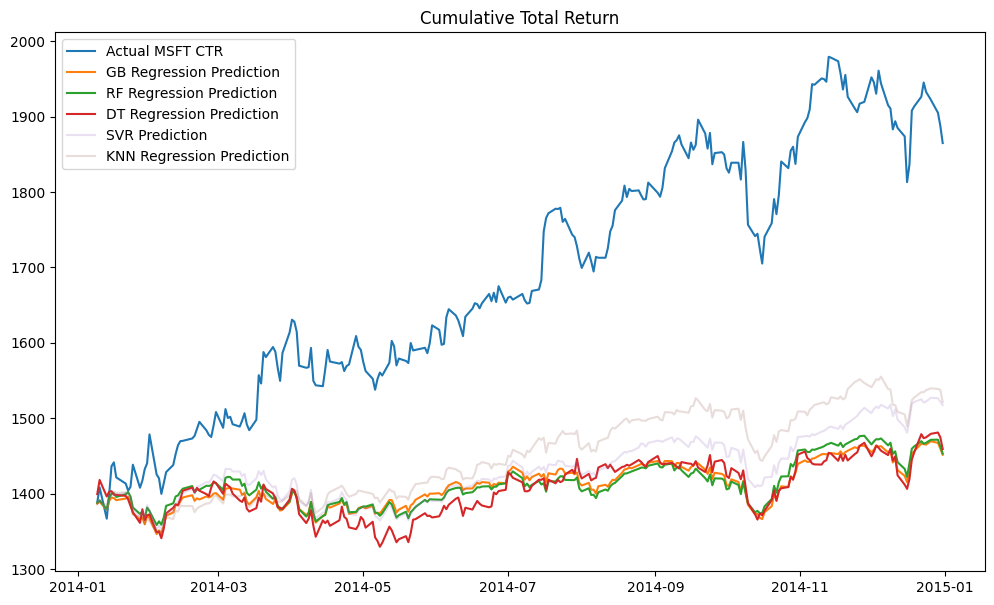

In [44]:
plt.figure(figsize = (12, 7))

plt.plot(SVR_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(GB_results['GB_pred'] + shift, label = 'GB Regression Prediction')
plt.plot(RF_results['RF_pred'] + shift, label = 'RF Regression Prediction')
plt.plot(DT_results['DT_pred'] + shift, label = 'DT Regression Prediction')
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction', alpha = 0.2)
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction', alpha = 0.2)


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Bagging

In [45]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Parameter grid for Bagging Regressor
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.8, 1.0],  # The fraction of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.8, 1.0],  # The fraction of features to draw from X to train each base estimator
}

# Initialize the Bagging Regressor with a base estimator
# Here, using DecisionTreeRegressor as the base estimator by default, but you can choose another
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor())

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Grid search with TimeSeriesSplit to respect the order in the time series data
grid_search = GridSearchCV(estimator=bagging_regressor, param_grid=param_grid, scoring=rmse_scorer, cv=tscv)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters for minimizing RMSE:", grid_search.best_params_)

# Predict using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSE and MAE on the test set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae_test = mean_absolute_error(Y_test, Y_pred)

print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")


Best parameters for minimizing RMSE: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Test RMSE: 0.009886905910154958
Test MAE: 0.0075460064057009295


In [46]:
BGG_results = pd.DataFrame(index = data.index)

BGG_results['MSFT_CTR'] = (1 + data['MSFT']).cumprod() *1000
BGG_results.loc[index:, 'BGG_pred'] = np.cumprod(1 + Y_pred) *1000

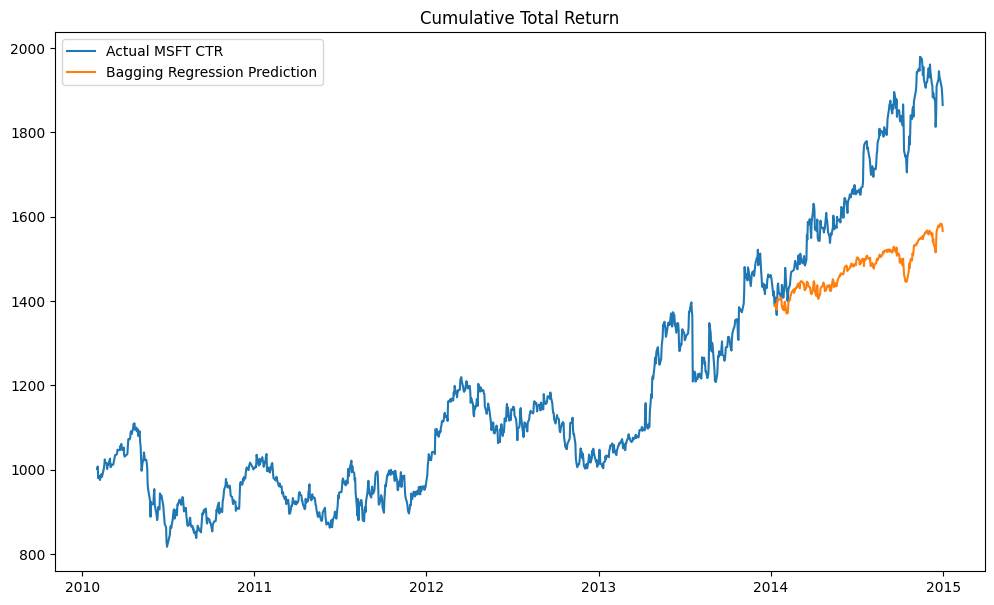

In [47]:
plt.figure(figsize = (12, 7))

shift = BGG_results['MSFT_CTR'].iloc[index] -1000

plt.plot(BGG_results['MSFT_CTR'], label = 'Actual MSFT CTR')
plt.plot(BGG_results['BGG_pred'] + shift, label = 'Bagging Regression Prediction')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

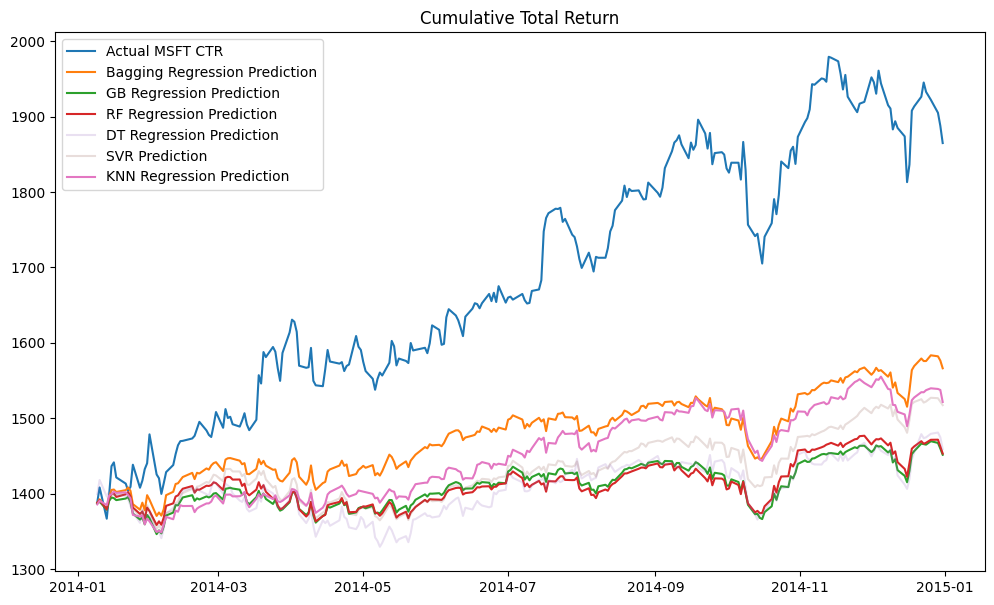

In [48]:
plt.figure(figsize = (12, 7))

plt.plot(SVR_results['MSFT_CTR'].iloc[index:], label = 'Actual MSFT CTR')
plt.plot(BGG_results['BGG_pred'] + shift, label = 'Bagging Regression Prediction')
plt.plot(GB_results['GB_pred'] + shift, label = 'GB Regression Prediction')
plt.plot(RF_results['RF_pred'] + shift, label = 'RF Regression Prediction')
plt.plot(DT_results['DT_pred'] + shift, label = 'DT Regression Prediction', alpha = 0.2)
plt.plot(SVR_results['SVR_pred'] + shift, label = 'SVR Prediction', alpha = 0.2)
plt.plot(KNN_results['KNN_pred_opt'] + shift, label = 'KNN Regression Prediction')


plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Conclusion

In [49]:
model_performance = {
    "Model": ["KNN Regression", "SVM Regression", "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression", "Bagging Regression"],
    "RMSE": [0.010218344823557154, 0.010218344823557154, 0.011229, 0.0099647, 0.0096593, 0.0098843],
    "MAE": [0.0070118615383303, 0.0070118615383303, 0.008668, 0.00737430, 0.00724099, 0.00747573]
}

In [54]:
com_table = pd.DataFrame(model_performance)
com_table['RMSE'] = com_table['RMSE']*100
com_table['MAE'] = com_table['MAE']*100
com_table

,Model,RMSE,MAE
0,KNN Regression,1.0218,0.7012
1,SVM Regression,1.0218,0.7012
2,Decision Tree Regression,1.1229,0.8668
3,Random Forest Regression,0.9965,0.7374
4,Gradient Boosting Regression,0.9659,0.7241
5,Bagging Regression,0.9884,0.7476


In [57]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

styled_com_table = com_table.style.apply(highlight_min, subset=['RMSE', 'MAE']).apply(highlight_max, subset=['RMSE', 'MAE'])
styled_com_table

,Model,RMSE,MAE
0,KNN Regression,1.021834,0.701186
1,SVM Regression,1.021834,0.701186
2,Decision Tree Regression,1.122900,0.866800
3,Random Forest Regression,0.996470,0.737430
4,Gradient Boosting Regression,0.965930,0.724099
5,Bagging Regression,0.988430,0.747573
